In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
heart_disease = pd.read_csv("./data set/heart-disease.csv")
heart_disease.head() # 查看前5行

# 顯示的target，為該筆資料最終是否具有糖尿病。


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease.info() # 查看檔案資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 資料拆分
- 接下來，要對這份完整的資料集，去進行拆分。
- X為train set，y為test set。

In [4]:
X = heart_disease.drop("target", axis=1) # axis=1 對col進行操作(就是刪掉target那一直排)
y = heart_disease["target"]

In [5]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2) # 75% 25%

# View the data shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## choose Estimator(估算器)
- 參考：https://scikit-learn.org/stable/machine_learning_map.html
- 我們依據 RandomForestClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

## 進行訓練(fit)


In [8]:
model.fit(X_train, y_train)

RandomForestClassifier()

- 一旦模型學習了數據中的模式，您就可以使用它們通過 predict（） 函數進行預測。

In [9]:
y_preds = model.predict(X_test)
y_preds

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

- 針對單筆資料抽取出來，並放進模型進行預測
- 以X_test的第10筆資料為例

In [10]:
print(X_test.iloc[10])

age          64.0
sex           1.0
cp            2.0
trestbps    125.0
chol        309.0
fbs           0.0
restecg       1.0
thalach     131.0
exang         1.0
oldpeak       1.8
slope         1.0
ca            0.0
thal          3.0
Name: 229, dtype: float64


- Scikit-learn 的機器學習模型需要2D 陣列作為輸入。形狀必須是 (n_samples, n_features)。
  - n_samples：樣本數量（幾筆資料）
  - n_features：特徵數量（每筆資料的特徵數量）。

- 處裡方式：針對單筆資料，使用reshape(1, -1)
  - 1：表示這是 1 筆資料（單樣本）
  - -1：讓 NumPy 自動計算特徵數量

In [11]:
model.predict(np.array(X_test.iloc[10]).reshape(1, -1)) # 針對第10筆進行預測

c:\Users\33313\.conda\envs\openai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Evaluate model 
- 這邊使用的方式為score() 
- 對於 分類模型，返回的是 準確率（accuracy）。
- 對於 回歸模型，返回的是 決定係數(R^2)，衡量模型對數據的擬合程度。

In [12]:
# 如果是以train set進行比較，一定會是1(就是用X_train, y_train來訓練的)
model.score(X_train, y_train)

1.0

In [13]:
model.score(X_test, y_test)

0.7868852459016393

## 模型評估可視化-熱圖(heatmap)

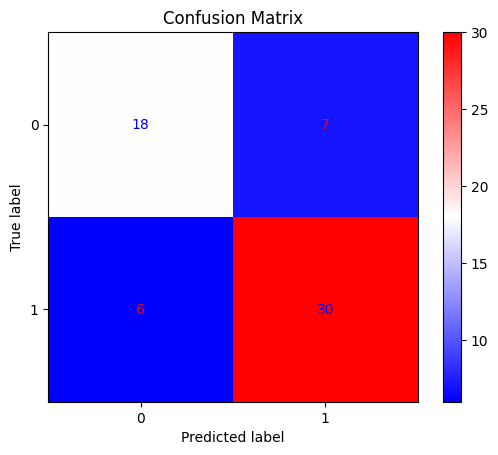

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# 計算混淆矩陣
cm = confusion_matrix(y_test, y_preds)

# 使用 sklearn 內建工具繪製混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="bwr")
plt.title('Confusion Matrix')
plt.show()



## 超參數調整(hyperparameter tuning)
- Hyperparameter Tuning（超參數調整）是一種用來優化機器學習模型性能的方法。
- 透過調整「超參數」來找到模型的最佳配置，從而提升模型的準確率或其他指標。

### 超參數
- 超參數是指訓練前需要設定的參數。
- 它不會在訓練過程中自動學習，而是需要你手動調整或使用工具來優化。
- 與之相對的，模型在訓練過程中學到的「參數」（如線性回歸的權重）稱為 參數（parameters）。

### 超參數調整意義
- 提升模型的準確率。
- 防止過擬合或欠擬合。
- 發揮模型的最大潛力。



In [15]:
# 手動調整第
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accruacy on test set: {model.score(X_test, y_test)}")
    print("")

Trying model with 10 estimators...
Model accruacy on test set: 0.7540983606557377

Trying model with 20 estimators...
Model accruacy on test set: 0.8360655737704918

Trying model with 30 estimators...
Model accruacy on test set: 0.7540983606557377

Trying model with 40 estimators...
Model accruacy on test set: 0.7704918032786885

Trying model with 50 estimators...
Model accruacy on test set: 0.7868852459016393

Trying model with 60 estimators...
Model accruacy on test set: 0.819672131147541

Trying model with 70 estimators...
Model accruacy on test set: 0.7540983606557377

Trying model with 80 estimators...
Model accruacy on test set: 0.8032786885245902

Trying model with 90 estimators...
Model accruacy on test set: 0.819672131147541



## 儲存模型


In [19]:
# save model
import pickle
pickle.dump(model,open("./model set/Random_Forest_model_01.pkl", "wb"))


In [21]:
# Load a saved model and make a prediction on a single example
loaded_model = pickle.load(open("./model set/Random_Forest_model_01.pkl", "rb"))
loaded_model.predict(np.array(X_test.iloc[10]).reshape(1, -1))

c:\Users\33313\.conda\envs\openai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)